# Gaussian Hidden Markov Models

In [1]:
import numpy as np
from scipy.stats import norm
from random import choice
import bisect

np.random.seed(37)

T = np.array([[0.7, 0.3], [0.4, 0.6]]).cumsum(axis=1)
D = [norm(1, 1), norm(5, 1)]

C_t = np.zeros(T.shape[1])
C_h = []
C_e = []

n_iters = 100_000

t = choice(range(T.shape[0]))
e = D[t].rvs()

for it in range(n_iters):
    C_t[t] += 1
    C_h.append(t)
    C_e.append(e)

    t_p = np.random.random()

    t = bisect.bisect_left(T[t], t_p)
    e = D[t].rvs()

C_t = C_t / C_t.sum()
C_h = np.array(C_h)
C_e = np.array(C_e)

In [2]:
C_t

array([0.57438, 0.42562])

In [3]:
C_h

array([1, 0, 0, ..., 1, 1, 0])

In [4]:
C_e.mean()

2.6963941758709185

<AxesSubplot:ylabel='Density'>

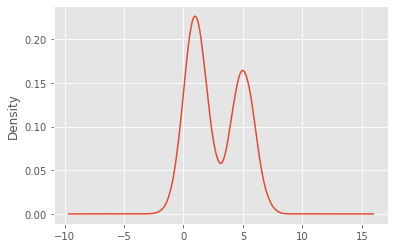

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

pd.Series(C_e).plot(kind='kde')

In [6]:
from hmmlearn import hmm

Q = C_e.reshape(C_e.shape[0], 1)
model = hmm.GaussianHMM(n_components=2, n_iter=2_000).fit(Q)

In [20]:
hidden_states = model.predict(Q)
mus = np.ravel(model.means_)
sigmas = np.ravel(np.sqrt([np.diag(c) for c in model.covars_]))
P = model.transmat_

In [21]:
hidden_states

array([0, 1, 1, ..., 0, 0, 1], dtype=int32)

In [22]:
mus, sigmas

(array([4.98616814, 0.99664265]), array([1.00900303, 0.99339134]))

In [23]:
P

array([[0.59492607, 0.40507393],
       [0.30068345, 0.69931655]])